In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

**Synthesizing BiData**

In [26]:
n_pts = 500
c_std = 0.4
xy_pts, label = datasets.make_circles(n_samples=n_pts, noise=0.1, factor=0.2)
x_data = torch.Tensor(xy_pts)
y_data = torch.Tensor(label.reshape(500, 1))

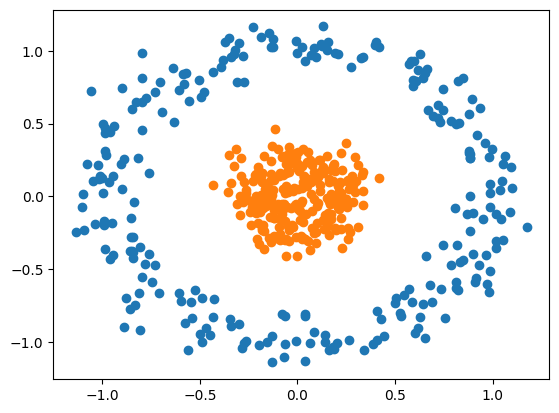

In [27]:
def scatter_plot():
  plt.scatter(xy_pts[label == 0, 0], xy_pts[label == 0, 1])
  plt.scatter(xy_pts[label == 1, 0], xy_pts[label == 1, 1])

scatter_plot()

**Constructing Digital Neural Network**

In [83]:
class DigitalNN(nn.Module):
  def __init__(self, in_size, H1, out_size):
    super().__init__()
    self.layer1 = nn.Linear(in_size, H1)
    self.layer2 = nn.Linear(H1, out_size)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.activation(self.layer1(x))
    x = self.activation(self.layer2(x))
    return x
    """
    The process of Layered Processing <==> Cortical Processing
    """

  def reason(self, x):
    pred = self.forward(x)

    if pred >= 0.5:
      return 1

    else:
      return 0
    """
    -Probabilistic Modeling <==> Logical Reasoning
    """

In [97]:
model = DigitalNN(2, 4, 1)

w, b1, b2, b3 = model.parameters()

**Training & Optimizing Digital NN**

In [98]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [99]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6959561705589294
epoch: 1 loss: 0.6975790858268738
epoch: 2 loss: 0.6945716738700867
epoch: 3 loss: 0.6922381520271301
epoch: 4 loss: 0.6938202381134033
epoch: 5 loss: 0.6936548948287964
epoch: 6 loss: 0.6914741396903992
epoch: 7 loss: 0.6900813579559326
epoch: 8 loss: 0.6899674534797668
epoch: 9 loss: 0.6892069578170776
epoch: 10 loss: 0.6870335936546326
epoch: 11 loss: 0.6845836043357849
epoch: 12 loss: 0.6827300786972046
epoch: 13 loss: 0.6807984709739685
epoch: 14 loss: 0.6777729988098145
epoch: 15 loss: 0.6738393306732178
epoch: 16 loss: 0.6697737574577332
epoch: 17 loss: 0.6656501293182373
epoch: 18 loss: 0.6608072519302368
epoch: 19 loss: 0.6549104452133179
epoch: 20 loss: 0.648338258266449
epoch: 21 loss: 0.641436755657196
epoch: 22 loss: 0.6339070200920105
epoch: 23 loss: 0.6253748536109924
epoch: 24 loss: 0.6159760355949402
epoch: 25 loss: 0.6060214638710022
epoch: 26 loss: 0.5955182313919067
epoch: 27 loss: 0.5842000246047974
epoch: 28 loss: 0.57191282510757

Text(0.5, 0, 'epoch')

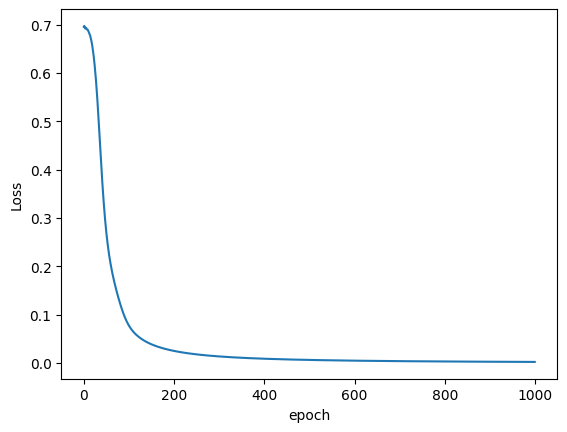

In [100]:
plt.plot(range(epochs),(losses))
plt.ylabel('Loss')
plt.xlabel('epoch')

**Visualizing Reasoning**

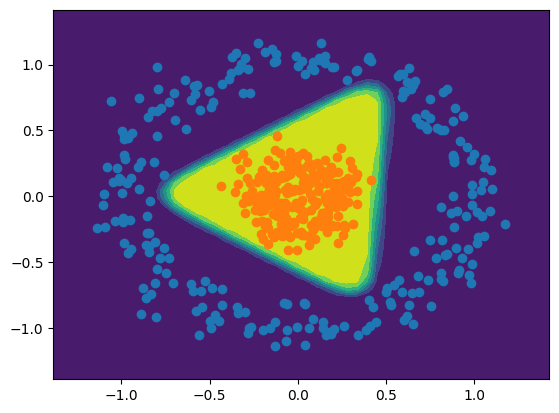

In [101]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)


plot_decision_boundary(xy_pts, label)
scatter_plot()



Prediction is 1


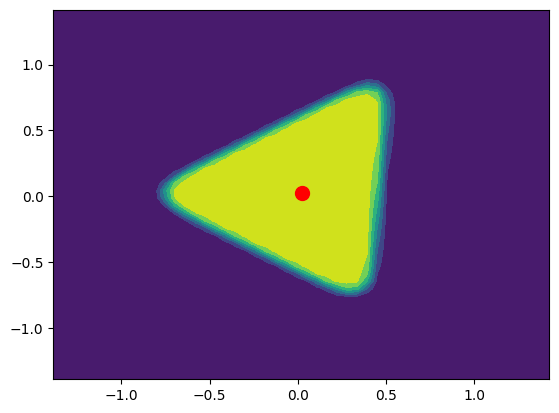

In [104]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.reason(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(xy_pts, label)